In [1]:
import pandas as pd
df=pd.read_csv('./data/homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [4]:
med=df.bedrooms.median()
df.bedrooms=df.bedrooms.fillna(med)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [5]:
# import math
# math.floor(med)

4

In [6]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [9]:
reg.predict([[3000,3,40]])  

/home/mahima/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

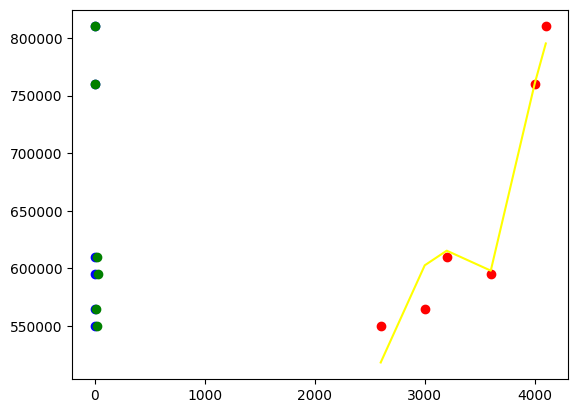

In [8]:
from matplotlib import pyplot as plt
plt.scatter(df.area,df.price,color='red')
plt.scatter(df.bedrooms,df.price,color='blue')
plt.scatter(df.age,df.price,color='green')
plt.plot(df.area,reg.predict(df[['area','bedrooms','age']]),color='yellow')
plt.show()

In [10]:
#hiring
df=pd.read_csv('./data/hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [11]:
!pip3 install word2number

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5582 sha256=6c082da56cbeffb5522db1bc3faecc2031dfc8338cf679bf0a6a186bae62939d
  Stored in directory: /home/mahima/.cache/pip/wheels/84/ff/26/d3cfbd971e96c5aa3737ecfced81628830d7359b55fbb8ca3b
Successfully built word2number


In [12]:
df['experience'].fillna('zero',inplace=True)
df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].mean(),inplace=True)
df

/tmp/ipykernel_14768/3449067839.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['experience'].fillna('zero',inplace=True)
/tmp/ipykernel_14768/3449067839.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.000000,9,50000
1,zero,8.000000,6,45000
2,five,6.000000,7,60000
3,two,10.000000,10,65000
4,seven,9.000000,6,70000
5,three,7.000000,10,62000
6,ten,7.857143,7,72000
7,eleven,7.000000,8,80000


In [13]:
from word2number import w2n
df.experience=df.experience.apply(w2n.word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,5,6.000000,7,60000
3,2,10.000000,10,65000
4,7,9.000000,6,70000
5,3,7.000000,10,62000
6,10,7.857143,7,72000
7,11,7.000000,8,80000


In [14]:
mod=LinearRegression()
mod.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])
mod.predict([[2,9,6]])

/home/mahima/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53290.89255945])

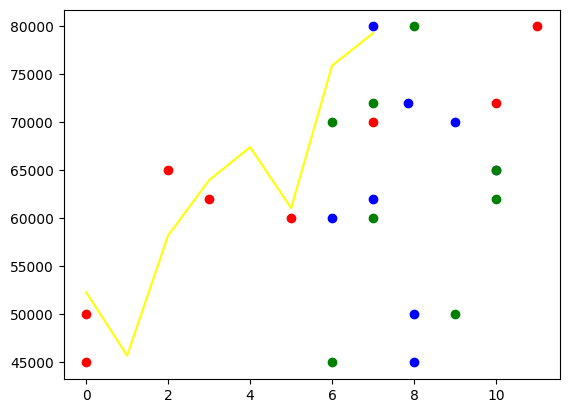

In [17]:
plt.scatter(df.experience,df['salary($)'],color='red')
plt.scatter(df['test_score(out of 10)'],df['salary($)'],color='blue')
plt.scatter(df['interview_score(out of 10)'],df['salary($)'],color='green')
plt.plot(mod.predict(df[['experience','test_score(out of 10)','interview_score(out of 10)']]),color='yellow')

plt.show()